In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Generar una muestra aleatoria de 10,000 puntos de la distribución de Rayleigh utilizando scale = 7.53

In [25]:
np.random.seed(42)
rayleigh_data = np.random.rayleigh(scale=7.53, size=10000)

Obtener 160 puntos del histograma de la muestra

In [26]:
hist_data = np.histogram(rayleigh_data, bins=160)

Visualización del histograma

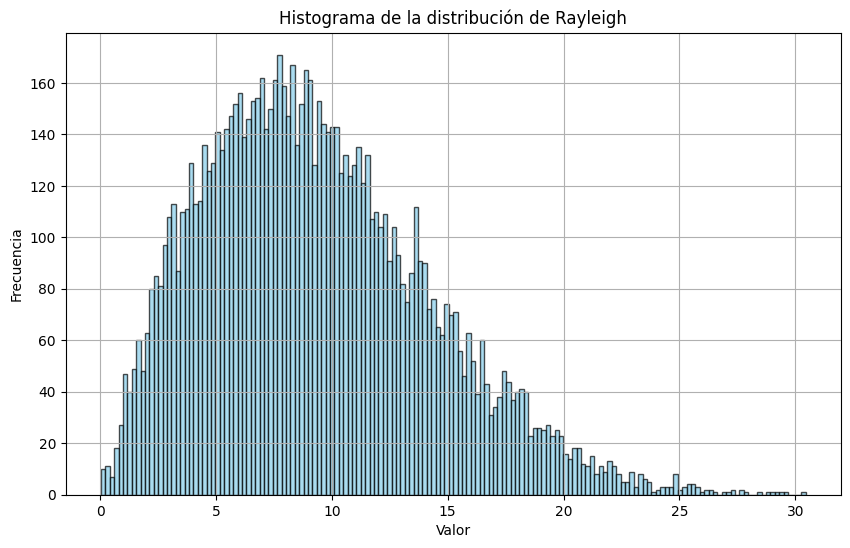

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(rayleigh_data, bins=160, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de la distribución de Rayleigh')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Dividir los puntos en conjunto de entrenamiento y prueba (80-20)

In [28]:
X_train, X_test = train_test_split(rayleigh_data, test_size=0.2, random_state=42)

Realizar una regresión polinomial del conjunto de entrenamiento probando distintos grados de polinomio. \\
Definir función para calcular sesgo, varianza y métricas de rendimiento.

In [29]:
def calculate_metrics(y_true, y_pred):
    bias = np.mean(y_true - y_pred)
    variance = np.var(y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return bias, variance, mae, mse, r2

Crear DataFrame para almacenar resultados

In [30]:
results_df = pd.DataFrame(columns=['Grado del polinomio', 'Sesgo', 'Varianza', 'MAE', 'MSE', 'R2'])

Iterar sobre distintos grados de polinomio

In [31]:
for degree in range(1, 11):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly_features.transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly_train, X_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    bias, variance, mae, mse, r2 = calculate_metrics(X_test, y_test_pred)
    results_df = results_df.append({'Grado del polinomio': degree,
                                    'Sesgo': bias,
                                    'Varianza': variance,
                                    'MAE': mae,
                                    'MSE': mse,
                                    'R2': r2}, ignore_index=True)

<ipython-input-31-83b127f8ab1e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Grado del polinomio': degree,
<ipython-input-31-83b127f8ab1e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Grado del polinomio': degree,
<ipython-input-31-83b127f8ab1e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Grado del polinomio': degree,
<ipython-input-31-83b127f8ab1e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Grado del polinomio': degree,
<ipython-input-31-83b127f8ab1e>:13: FutureWarning: The frame.app

In [32]:
# Imprimir resultados
print("Resultados sin regularización:")
print(results_df)

Resultados sin regularización:
   Grado del polinomio         Sesgo   Varianza           MAE           MSE  \
0                  1.0 -2.464511e-14  23.706545  2.464511e-14  6.368501e-28   
1                  2.0 -2.464450e-14  23.706545  2.494648e-14  6.614729e-28   
2                  3.0 -2.760307e-14  23.706545  2.488803e-13  1.758645e-25   
3                  4.0  5.785861e-15  23.706545  3.276446e-12  2.307140e-23   
4                  5.0  1.755438e-12  23.706545  9.761070e-11  3.785254e-20   
5                  6.0  2.705364e-11  23.706545  1.615158e-09  3.797612e-18   
6                  7.0  7.685655e-10  23.706545  4.254331e-08  2.698135e-15   
7                  8.0 -3.331961e-08  23.706572  1.954306e-06  4.482147e-11   
8                  9.0 -1.033249e-06  23.707082  3.927999e-05  1.454108e-08   
9                 10.0 -1.110792e-05  23.713442  7.670662e-04  1.021581e-06   

    R2  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0  
5  1.0  
6  1.0  
7  1.0  
8  1.0  
9  1.0  


Repetir el análisis utilizando regularización y validación cruzada utilizando RidgeCV para regularización

In [33]:
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_model.fit(X_poly_train, X_train)

y_train_pred_ridge = ridge_model.predict(X_poly_train)
y_test_pred_ridge = ridge_model.predict(X_poly_test)

bias_ridge, variance_ridge, mae_ridge, mse_ridge, r2_ridge = calculate_metrics(X_test, y_test_pred_ridge)

Imprimir resultados con regularización

In [34]:
print("\nResultados con regularización:")
print(f"Sesgo: {bias_ridge}")
print(f"Varianza: {variance_ridge}")
print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")
print(f"R2: {r2_ridge}")


Resultados con regularización:
Sesgo: 7.87757571202139e+19
Varianza: 6.35403768736705e+43
MAE: 1.32772065699072e+21
MSE: 6.354658249358036e+43
R2: -2.680550098956527e+42


 Presentar el mejor modelo polinomial y argumentar por qué es el mejor. \\
 El mejor modelo es aquel que tiene un buen rendimiento en el conjunto de prueba y no está sobreajustado. \\
Se puede determinar observando las métricas de rendimiento y la complejidad del modelo.

Visualización del mejor modelo polinomial

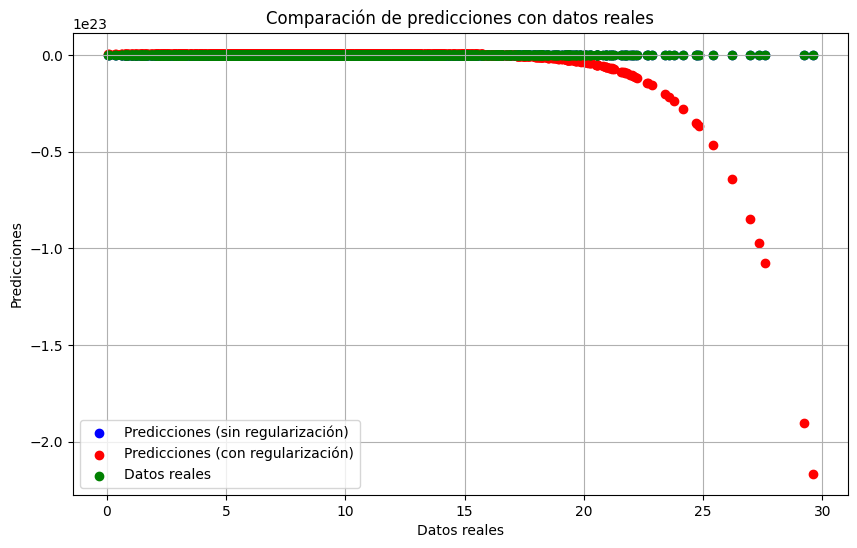

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test_pred, color='blue', label='Predicciones (sin regularización)')
plt.scatter(X_test, y_test_pred_ridge, color='red', label='Predicciones (con regularización)')
plt.scatter(X_test, X_test, color='green', label='Datos reales')
plt.title('Comparación de predicciones con datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

Utilizar la distribución de Rayleigh utilizando el estimador máximo verosímil y compararlo con el modelo polinomial. \\
Se estima el parámetro de la distribución utilizando el método de máxima verosimilitud.

In [36]:
scale_mle = np.sqrt(np.mean(X_train ** 2) / 2)

Calcular predicciones utilizando la distribución de Rayleigh

In [37]:
y_test_pred_rayleigh = np.random.rayleigh(scale=scale_mle, size=len(X_test))

Métricas de rendimiento para la distribución de Rayleigh

In [38]:
bias_rayleigh, variance_rayleigh, mae_rayleigh, mse_rayleigh, r2_rayleigh = calculate_metrics(X_test, y_test_pred_rayleigh)

Imprimir resultados para la distribución de Rayleigh

In [39]:
print("\nResultados utilizando distribución de Rayleigh (MLE):")
print(f"Sesgo: {bias_rayleigh}")
print(f"Varianza: {variance_rayleigh}")
print(f"MAE: {mae_rayleigh}")
print(f"MSE: {mse_rayleigh}")
print(f"R2: {r2_rayleigh}")


Resultados utilizando distribución de Rayleigh (MLE):
Sesgo: -0.007289819689011956
Varianza: 24.1222966563907
MAE: 5.422342567040706
MSE: 47.219705830173844
R2: -0.9918425534301158
